# Linear equation system solving techniques comparison



In [74]:
import numpy as np
import math
import datetime as dt
import matplotlib as mpl
import matplotlib.pyplot as plt


<h4> 

    <i>
        index = 172110 </br>
        c = 1
        </br>
        d = 0
        </br>
        e = 1 
        </br>
        f = 2
        </br>
        9cd = 910
    </i>
</h4>

**Exercise A**


In [58]:
N = 300
iter_limit = 100
epsilon = 10.0 ** (-6)
f = 2
e = 1
a1 = a2 = a3 = 0

def init_a_exercise():
    global a1, a2, a3, iter_limit
    a1 = 5 + e
    a2 = a3 = -1
    iter_limit = 50



**Striped matrix generating function**


In [59]:
def generate_striped_matrix(size: int):
    array = np.ndarray(shape=(size,size))
    # wybór elementu na diagonali (i,i)
    for i in range(size):
        # wybór 2 elementy przed, diagonal i 2 elementy za diagonalą
        for j in range(size):
            if 0 <= j < size:
                if abs(i - j) == 2:
                    array[i][j] = a3
                elif abs(i - j) == 1:
                    array[i][j] = a2
                elif i == j:
                    array[i][j] = a1
                else:
                    array[i][j] = 0
    return array
                



**Residue vector second norm calculation**


In [60]:
def calculate_residue_vector_norm(A: np.ndarray, x: np.ndarray, B: np.ndarray):
    n_size = A.shape[0]
    residue_norm = 0.0
    for i in range(n_size):
        row = 0.0
        for j in range(n_size):
            row += A[i][j] * x[j]
        row -= B[i]
        residue_norm += row ** 2
    return math.sqrt(residue_norm)
    



**Timing functions**

In [61]:
starting_time: dt.datetime
def tic():
    global starting_time
    starting_time = dt.datetime.now()
    
def toc() -> dt.timedelta:
    time_diff = dt.datetime.now() - starting_time 
    return time_diff


**Function printing details about tested solution.**


In [68]:
def print_details(A: np.ndarray, B: np.ndarray, x: np.ndarray, iteration_count: int, time: dt.timedelta):
    print()
    print("Residue vector second norm value: ", calculate_residue_vector_norm(A, x, B))
    print("Minutes: ", int(time.seconds / 60), "seconds: ", time.seconds % 60)
    print("Iteration count: ", iteration_count)
    print("Time per iteration in seconds: ", time.seconds / iteration_count)



**Matrix initialization**


In [64]:
B: np.ndarray
A: np.ndarray
x: np.ndarray

def generate_equation_system():
    global A
    global B   
    global x
    
    # Wektor pobudzenia
    B = np.ndarray(shape=(N, 1), dtype=float)
    for i in range(N):
        B[i] = math.sin(i * (f + 1))
    
    # Macierz systemowa
    A = generate_striped_matrix(N)
    
    # Macierz rozwiązań przybliżonych. Zawiera początkowe przybliżenie a później przyjmuje wartości nadane przez
    # metody iteracyjne.
    x = np.ndarray(shape=(N, 1), dtype=float)
    for i in range(N):
        x[i] = 0




# Exercise B

**Jacobi's method**

In [65]:
def jacobis_next_iteration(matrix: np.ndarray, b_vec: np.ndarray, estimates: np.ndarray) -> np.ndarray:
    this_iteration: np.ndarray = np.ndarray(shape=(estimates.shape[0],1))
    for i in range(matrix.shape[0]):
        # Copy of the i-th equation coefficients
        curr_equation = matrix[i].copy()
        # The coefficient of the x which we're currently we're estimating new value for.
        curr_calc_coeff = curr_equation[i]
        # Inserting the b vector value into the equation.
        new_x = - b_vec[i]
        for j in range(curr_equation.shape[0]):
            # for every variable except the one we're currently calculating -> (a1 * x1 + ... + an * xn - b)/ aj = xj 
            if j != i:
                # eq[j] is the coefficient of x(j) and estimates[j] is the previous value of the x(j)
                new_x += curr_equation[j] * estimates[j]
        this_iteration[i] = new_x / - curr_calc_coeff
    return this_iteration





**Gauss-Seidl's method.**


In [66]:
def gauss_seidl_next_iteration(matrix: np.ndarray, b_vec: np.ndarray, estimates: np.ndarray) -> np.ndarray:
    this_iteration: np.ndarray = np.ndarray(shape=(estimates.shape[0],1))
    for i in range(matrix.shape[0]):
        # Copy of the i-th equation coefficients
        current_equation = matrix[i].copy()
        # The coefficient of the x which we're calculating new value for
        curr_calc_coeff = current_equation[i]
        # Inserting the b vector value into the equation
        new_x = - b_vec[i]
        for j in range(i):
            new_x += current_equation[j] * this_iteration[j]
        for j in range(i + 1, matrix.shape[0]):
            new_x += current_equation[j] * estimates[j]
        this_iteration[i] = new_x / - curr_calc_coeff
    return this_iteration




    

**Testing the Jacobi's method on data from exercise A**


In [69]:
init_a_exercise()
generate_equation_system()
tic()

residue_vector_norm = calculate_residue_vector_norm(A, x, B)
i = 0
while residue_vector_norm > epsilon and i < iter_limit:
    x = jacobis_next_iteration(A, B, x)
    i += 1
    residue_vector_norm = calculate_residue_vector_norm(A, x, B)
    print(".", end="")

# Printing details about this method time, iteration count etc.
print_details(A, B, x, i, toc())



........................
Residue vector second norm value:  8.140195485706073e-07
Minutes:  0 seconds:  11
Iteration count:  24
Time per iteration in seconds:  0.4583333333333333


**Testing Gauss-Seidl's on data from A exercise**


In [70]:
init_a_exercise()
generate_equation_system()
tic()


# residue_vector_norm_values = [float]
residue_vector_norm = calculate_residue_vector_norm(A, x, B)
i = 0
while  residue_vector_norm > epsilon and i < iter_limit:
    x = gauss_seidl_next_iteration(A, B, x)
    i += 1
    residue_vector_norm = calculate_residue_vector_norm(A, x, B)
    # residue_vector_norm_values.append(residue_vector_norm)
    print(".", end="")
    
# Printing details about this method time, iteration count etc.
print_details(A, B, x, i, toc())



................
Residue vector second norm value:  7.696797973615508e-07
Minutes:  0 seconds:  7
Iteration count:  16
Time per iteration in seconds:  0.4375


The Gauss-Seidl's method consequently performs better than Jacobi's method. This is true both for iteration count
and the time of a single iteration. This is partially due to the method of variables caching by the processor and 
the faster access the ones used more recently. However less efficient as sequential algorithm, the Jacobi's method
is possible to run concurrently. 
 



## Exercise C

**Changing the coefficients used to generate equation system to match the specification of exercise C**

In [71]:

def init_c_exercise():
    global a1, a2, a3, iter_limit
    a1 = 3
    a2 = a3 = -1
    iter_limit = 30


**Testing the Jacobi's method on data from exercise C**


..............................
Residue vector second norm value:  64.92804780786507
Minutes:  0 seconds:  14
Iteration count:  30
Time per iteration in seconds:  0.4666666666666667


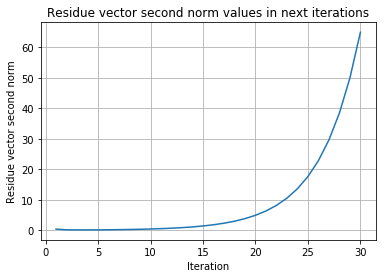

In [79]:
init_c_exercise()
generate_equation_system()
tic()

i = 0
residue_vector_norm = calculate_residue_vector_norm(A, x, B)
next_norm_values = []
while residue_vector_norm > epsilon and i < iter_limit:
    x = jacobis_next_iteration(A, B, x)
    residue_vector_norm = calculate_residue_vector_norm(A, x, B)
    next_norm_values.append(residue_vector_norm)
    i += 1
    print(".", end="")

# Printing details about this method time, iteration count etc.
print_details(A, B, x, i, toc())

# Plotting the value of residue vector norm
fig, ax = plt.subplots()
ax.plot(range(1, i + 1), next_norm_values)

ax.set(xlabel='Iteration', ylabel='Residue vector second norm',
       title='Residue vector second norm values in next iterations')
ax.grid()
plt.show()


The plot clearly shows that changed input matrix makes Jacobis method not suitable for solving 
this system. Residue vector increases each iteration, which means that the approximated
solution vector won't converge.  




**Testing Gauss-Seidl's on data from C exercise**


..............................
Residue vector second norm value:  1536159.86028818
Minutes:  0 seconds:  14
Iteration count:  30
Time per iteration in seconds:  0.4666666666666667


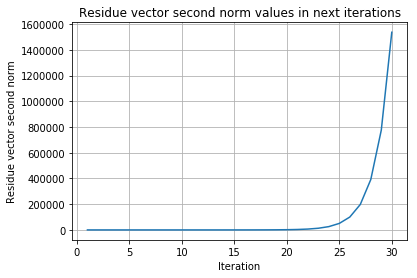

In [81]:
init_c_exercise()
generate_equation_system()
tic()

i = 0
next_norm_values = []
residue_vector_norm = calculate_residue_vector_norm(A, x, B)  
while  residue_vector_norm > epsilon and i < iter_limit:
    x = gauss_seidl_next_iteration(A, B, x)
    residue_vector_norm = calculate_residue_vector_norm(A, x, B)
    next_norm_values.append(residue_vector_norm)
    i += 1
    print(".", end="")
    
# Printing details about this method time, iteration count etc.
print_details(A, B, x, i, toc())


# Plotting the value of residue vector norm
fig, ax = plt.subplots()
ax.plot(range(1, i + 1), next_norm_values)

ax.set(xlabel='Iteration', ylabel='Residue vector second norm',
       title='Residue vector second norm values in next iterations')
ax.grid()
plt.show()



Gauss-Seidl's method also does have requirements regarding input matrix for it to converge.
In this case those reqiurements are not met and the solution vector won't converge to accurate
solution. The chart shows exponential growth of residue vector value in respect to iteration 
count.







## Exercise C

**LU Factorization method**


In [55]:
def matrix_decomposition(A: np.ndarray) -> (np.ndarray, np.ndarray):
    m = A.shape[0]
    U = A.copy()
    L = np.identity(m)
    for k in range(0, m - 1):
        for j in range(k + 1, m):
            L[j][k] = U[j][k]/U[k][k]
            for i in range(k, m):
                U[j][i] = U[j][i] - L[j][k]*U[k][i]
    return L, U

def forward_substitution(L: np.ndarray, B: np.ndarray) -> np.ndarray:
    x = np.ndarray(shape=(L.shape[0],1))
    for e in range(L.shape[0]):
        curr_calc_coeff_val = 0.0
        curr_eq = L[e].copy()
        # adding every calculated coeff so far
        for i in range(e):
            curr_calc_coeff_val -= curr_eq[i] * x[i]
        x[e] = B[e] + curr_calc_coeff_val
    return x

def backward_substitution(U: np.ndarray, y: np.ndarray) -> np.ndarray:
    n = U.shape[0]
    x = np.ndarray(shape=(n, 1))
    for e in range(n):
        curr_calc_coeff_val = 0.0
        curr_eq = U[-(e+1)].copy()
        # adding every calculated coeff so far
        for i in range(e):
            curr_calc_coeff_val -= curr_eq[-(i+1)] * x[-(i+1)]
        x[-(e+1)] = (y[-(e+1)] + curr_calc_coeff_val) / curr_eq[-(e+1)]
    return x
        
    
def solve_lu_equation(L: np.ndarray, U: np.ndarray, B: np.ndarray) -> np.ndarray:
    n = L.shape[0]
    # LUx = b -> L(Ux) = b
    # Ly = b && y = Ux
    # Solving for y
    y = forward_substitution(L, B)
    x = backward_substitution(U, y)
    return x


**LU Factorization method testing**
            

In [57]:
init_c_exercise()
generate_equation_system()
L, U = matrix_decomposition(A)

x = solve_lu_equation(L,U,B)

print("Residue vector norm value: ", calculate_residue_vector_norm(A, x, B))


Residue vector norm value:  7.245968407401433e-15


LU Factorization is a direct method of solving equations and therefore the requirements 
posed by the iterative methods do not hold. Equation system from ex.C is solved by LU Factorization 
method almost perfectly accurate (using floats account for the imperfection).




Initializing last exercise


In [ ]:

jacobis = []
gauss = []

print("100 x 100: ")
N =  100
init_a_exercise()
generate_equation_system()
tic()

residue_vector_norm = calculate_residue_vector_norm(A, x, B)
i = 0
while residue_vector_norm > epsilon and i < iter_limit:
    x = jacobis_next_iteration(A, B, x)
    i += 1
    residue_vector_norm = calculate_residue_vector_norm(A, x, B)
    print("Current iteration: ", i)

jacobis.append(toc())
# print_details(A, B, x, i, toc())


init_a_exercise()
generate_equation_system()
tic()

residue_vector_norm = calculate_residue_vector_norm(A, x, B)
i = 0
while residue_vector_norm > epsilon and i < iter_limit:
    x = gauss_seidl_next_iteration(A, B, x)
    i += 1
    residue_vector_norm = calculate_residue_vector_norm(A, x, B)
    print("Current iteration: ", i)

# print_details(A, B, x, i, toc())

gauss.append(toc())



print("500 x 500")
N = 500  

init_a_exercise()
generate_equation_system()
tic()


residue_vector_norm = calculate_residue_vector_norm(A, x, B)
i = 0
while residue_vector_norm > epsilon and i < iter_limit:
    x = jacobis_next_iteration(A, B, x)
    i += 1
    residue_vector_norm = calculate_residue_vector_norm(A, x, B)
    print("Iterations passed: ", i)
    
# print_details(A, B, x, i, toc())
jacobis.append(toc())


generate_equation_system()
tic()

residue_vector_norm = calculate_residue_vector_norm(A, x, B)
i = 0
while residue_vector_norm > epsilon and i < iter_limit:
    x = gauss_seidl_next_iteration(A, B, x)
    i += 1
    residue_vector_norm = calculate_residue_vector_norm(A, x, B)
    # residue_vector_norm_values.append(residue_vector_norm)
    print("Iterations passed: ", i)
    
# Printing details about this method time, iteration count etc.
# print_details(A, B, x, i, toc())
gauss.append(toc())







print("1000 x 1000: ")


N = 1000  

init_a_exercise()
generate_equation_system()
tic()
residue_vector_norm = calculate_residue_vector_norm(A, x, B)
i = 0
while residue_vector_norm > epsilon and i < iter_limit:
    x = jacobis_next_iteration(A, B, x)
    i += 1
    residue_vector_norm = calculate_residue_vector_norm(A, x, B)
    print("Current iteration: ", i)

# Printing details about this method time, iteration count etc.
# print_details(A, B, x, i, toc())
jacobis.append(toc())


init_a_exercise()
generate_equation_system()
tic()
residue_vector_norm = calculate_residue_vector_norm(A, x, B)
i = 0
while residue_vector_norm > epsilon and i < iter_limit:
    x = gauss_seidl_next_iteration(A, B, x)
    i += 1
    residue_vector_norm = calculate_residue_vector_norm(A, x, B)
    print("Current iteration: ", i)

# Printing details about this method time, iteration count etc.
# print_details(A, B, x, i, toc())
gauss.append(toc())






print("2000 x 2000: ")

N = 2000  

init_a_exercise()
generate_equation_system()
tic()
# residue_vector_norm_values = [float]
residue_vector_norm = calculate_residue_vector_norm(A, x, B)
i = 0
while residue_vector_norm > epsilon and i < iter_limit:
    x = jacobis_next_iteration(A, B, x)
    i += 1
    residue_vector_norm = calculate_residue_vector_norm(A, x, B)
    # residue_vector_norm_values.append(residue_vector_norm)
    print("Iterations passed: ", i)
    
# Printing details about this method time, iteration count etc.
# print_details(A, B, x, i, toc())
jacobis.append(toc())



init_a_exercise()
generate_equation_system()
tic()
residue_vector_norm = calculate_residue_vector_norm(A, x, B)
i = 0
while residue_vector_norm > epsilon and i < iter_limit:
    x = gauss_seidl_next_iteration(A, B, x)
    i += 1
    residue_vector_norm = calculate_residue_vector_norm(A, x, B)
    # residue_vector_norm_values.append(residue_vector_norm)
    print("Iterations passed: ", i)
    
# Printing details about this method time, iteration count etc.
# print_details(A, B, x, i, toc())
gauss.append(toc())





100 x 100: 
Current iteration:  1
Current iteration:  2
Current iteration:  3
Current iteration:  4
Current iteration:  5
Current iteration:  6
Current iteration:  7
Current iteration:  8
Current iteration:  9
Current iteration:  10
Current iteration:  11
Current iteration:  12
Current iteration:  13
Current iteration:  14
Current iteration:  15
Current iteration:  16
Current iteration:  17
Current iteration:  18
Current iteration:  19
Current iteration:  20
Current iteration:  21
Current iteration:  22
Current iteration:  23
Current iteration:  24
Residue vector second norm value:  8.124472480419429e-07
Minutes:  0 seconds:  1
Time per iteration in seconds:  0.041666666666666664
500 x 500
Iterations passed:  1
Iterations passed:  2
Iterations passed:  3
Iterations passed:  4
Iterations passed:  5
Iterations passed:  6
Iterations passed:  7
Iterations passed:  8
Iterations passed:  9
Iterations passed:  10
Iterations passed:  11
Iterations passed:  12
Iterations passed:  13
Iterations 

In [37]:
print("3000 x 3000: ")

N = 3000
init_a_exercise()
generate_equation_system()

tic()
residue_vector_norm = calculate_residue_vector_norm(A, x, B)
i = 0
while residue_vector_norm > epsilon and i < iter_limit:
    x = jacobis_next_iteration(A, B, x)
    i += 1
    residue_vector_norm = calculate_residue_vector_norm(A, x, B)
    print("Current iteration: ", i)

# Printing details about this method time, iteration count etc.
# print_details(A, B, x, i, toc())
jacobis.append(toc())



init_a_exercise()
generate_equation_system()

tic()
residue_vector_norm = calculate_residue_vector_norm(A, x, B)
i = 0
while residue_vector_norm > epsilon and i < iter_limit:
    x = gauss_seidl_next_iteration(A, B, x)
    i += 1
    residue_vector_norm = calculate_residue_vector_norm(A, x, B)
    print("Current iteration: ", i)

# Printing details about this method time, iteration count etc.
print_details(A, B, x, i, toc())
gauss.append(toc())


# Plotting the value of residue vector norm
fig, ax = plt.subplots()
its = [100,500,1000,2000,3000]

ax.plot(its, jacobis)

ax.set(xlabel='Matrix size', ylabel='Time to meet specified precision',
       title='Calculation time in respect to input matrix size (Jacobis)')
ax.grid()
plt.show()


fig, ax = plt.subplots()

ax.plot(its, gauss)

ax.set(xlabel='Matrix size', ylabel='Time to meet specified precision',
       title='Calculation time in respect to input matrix size (Gauss)')
ax.grid()
plt.show()




3000 x 3000: 
Current iteration:  1
Current iteration:  2
Current iteration:  3
Current iteration:  4
Current iteration:  5
Current iteration:  6
Current iteration:  7
Current iteration:  8
Current iteration:  9
Current iteration:  10
Current iteration:  11
Current iteration:  12
Current iteration:  13
Current iteration:  14
Current iteration:  15
Current iteration:  16
Current iteration:  17
Current iteration:  18
Current iteration:  19
Current iteration:  20
Current iteration:  21
Current iteration:  22
Current iteration:  23
Residue vector second norm value:  6.878638859433061e-07
Minutes:  19 seconds:  7
Time per iteration in seconds:  49.869565217391305


<h1>Summary</h1>
